In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import glob
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import time 

### 데이터 확인 

In [2]:
df=pd.read_csv('데이터3.csv')
df

,기업명,신용평점,신용등급(종속변수),유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
0,성지건설(주),7.0,1,115.7,104.9,120.1,-118.7,18.7,7.1,-4.4,-20.2,-20.7,9.0,1.2,1.1,-12.1,-10.6,-24.0
1,(주)피에스엠씨,7.0,1,199.3,153.2,45.8,-77.9,9.1,16.7,-19.8,-40.5,-26.7,5.0,6.1,0.5,-8.5,-17.2,-13.2
2,(주)체시스,7.0,1,76.7,67.1,143.7,1.3,100.8,79.8,0.5,-11.9,73.2,12.8,4.5,0.6,0.5,0.9,1.4
3,(주)스틸플라워,9.0,1,47.4,35.5,198.0,-2.9,166.6,214.8,-17.9,-43.6,6.7,3.4,1.7,0.3,-25.9,-98.7,-72.9
4,(주)형지아이앤씨,7.0,1,152.2,37.9,101.2,0.2,47.0,23.2,-2.4,9.1,29.7,2.5,8.9,1.2,-4.0,-3.5,-8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,두산엔진(주),8.0,1,64.9,34.3,147.4,0.7,56.5,39.3,0.5,16.2,29.7,4.0,11.7,0.6,-2.1,-3.6,-5.3
1768,신대양제지(주),3.0,0,362.8,306.3,27.7,32.9,3.9,4.0,2.7,-3.3,-16.0,15.9,7.8,0.7,2.0,2.8,2.5
1769,(주)신화콘텍,6.0,1,149.5,114.8,83.2,1.0,71.2,66.0,19.0,-4.8,5.5,6.1,3.9,0.5,0.9,1.6,1.5
1770,에프엔에스테크(주),5.0,0,128.3,86.6,124.3,22.9,39.4,16.3,45.5,44.9,196.2,7.1,14.2,1.5,18.8,12.8,43.1


In [3]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기업명         1772 non-null   object 
 1   신용평점        1772 non-null   float64
 2   신용등급(종속변수)  1772 non-null   int64  
 3   유동비율        1772 non-null   float64
 4   당좌비율        1772 non-null   float64
 5   부채비율        1772 non-null   float64
 6   영업이익이자보상비율  1772 non-null   float64
 7   차입금/자기자본    1772 non-null   float64
 8   차입금/매출액     1772 non-null   float64
 9   총자산증가율      1772 non-null   float64
 10  매출액증가율      1772 non-null   float64
 11  순이익증가율      1772 non-null   float64
 12  재고자산회전율     1772 non-null   float64
 13  매출채권회전율     1772 non-null   float64
 14  총자본회전율      1772 non-null   float64
 15  총자본순이익율     1772 non-null   float64
 16  매출액순이익율     1772 non-null   float64
 17  자기자본순이익율    1772 non-null   float64
dtypes: float64(16), int64(1), object(1)
memory usage: 249.3+ KB


In [4]:
df.isnull().sum()  

기업명           0
신용평점          0
신용등급(종속변수)    0
유동비율          0
당좌비율          0
부채비율          0
영업이익이자보상비율    0
차입금/자기자본      0
차입금/매출액       0
총자산증가율        0
매출액증가율        0
순이익증가율        0
재고자산회전율       0
매출채권회전율       0
총자본회전율        0
총자본순이익율       0
매출액순이익율       0
자기자본순이익율      0
dtype: int64

In [5]:
df1010=df.drop(['신용평점','신용등급(종속변수)'],axis=1)
df1010.describe()


,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
count,1772.000000,1772.000000,1772.000000,1.772000e+03,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000
mean,300.384199,257.314616,96.297291,-1.351646e+03,54.000339,61.845090,13.443115,14.392438,164.477483,213.260384,25.315745,0.816140,0.803612,-5.288431,-1.182619
std,650.724174,635.733073,213.224905,1.081848e+05,133.242148,478.864994,40.638186,94.702456,2086.418925,3575.695649,442.498441,0.513014,17.330094,166.000332,41.189312
min,1.100000,1.100000,0.300000,-4.493653e+06,0.000000,0.000000,-79.900000,-85.300000,-99.900000,0.100000,0.100000,0.000000,-302.300000,-3380.900000,-914.500000
25%,98.050000,73.675000,29.275000,7.000000e-01,9.900000,9.275000,-1.000000,-7.300000,-27.100000,5.800000,3.375000,0.500000,-0.300000,-0.400000,-0.625000
50%,159.600000,127.750000,60.850000,5.600000e+00,29.050000,24.300000,4.950000,2.700000,4.800000,10.400000,5.000000,0.700000,2.700000,3.600000,4.500000
75%,294.225000,246.550000,108.625000,3.290000e+01,61.650000,50.525000,15.500000,14.425000,49.625000,24.625000,7.600000,1.100000,6.325000,8.600000,10.100000
max,17166.100000,17101.600000,5543.700000,6.212846e+05,2734.300000,18856.000000,629.400000,2452.300000,76767.500000,145148.600000,17302.800000,4.400000,195.900000,4711.600000,223.200000


In [6]:
df.describe(include = object)

,기업명
count,1772
unique,1772
top,성지건설(주)
freq,1


In [7]:
print(df.describe())
print(df.describe(include = object))

              신용평점   신용등급(종속변수)          유동비율          당좌비율         부채비율  \
count  1772.000000  1772.000000   1772.000000   1772.000000  1772.000000   
mean      4.848194     0.370203    300.384199    257.314616    96.297291   
std       1.908134     0.482995    650.724174    635.733073   213.224905   
min       1.000000     0.000000      1.100000      1.100000     0.300000   
25%       3.000000     0.000000     98.050000     73.675000    29.275000   
50%       5.000000     0.000000    159.600000    127.750000    60.850000   
75%       6.000000     1.000000    294.225000    246.550000   108.625000   
max      10.000000     1.000000  17166.100000  17101.600000  5543.700000   

         영업이익이자보상비율     차입금/자기자본       차입금/매출액       총자산증가율       매출액증가율  \
count  1.772000e+03  1772.000000   1772.000000  1772.000000  1772.000000   
mean  -1.351646e+03    54.000339     61.845090    13.443115    14.392438   
std    1.081848e+05   133.242148    478.864994    40.638186    94.702456   
min   -4.49

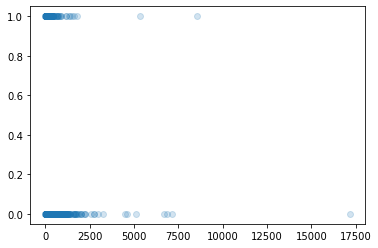

In [8]:
plt.scatter(df['유동비율'],df['신용등급(종속변수)'],alpha=0.2)
plt.show()

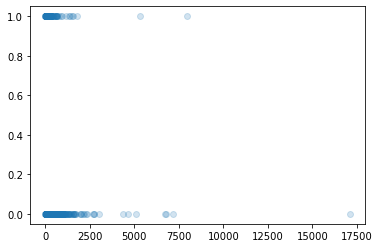

In [9]:
plt.scatter(df['당좌비율'],df['신용등급(종속변수)'],alpha=0.2)
plt.show()

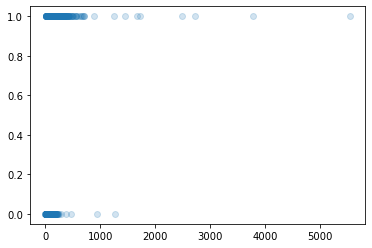

In [10]:
plt.scatter(df['부채비율'],df['신용등급(종속변수)'],alpha=0.2)
plt.show()

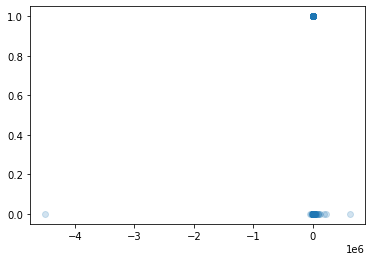

In [11]:
plt.scatter(df['영업이익이자보상비율'],df['신용등급(종속변수)'],alpha=0.2)
plt.show()

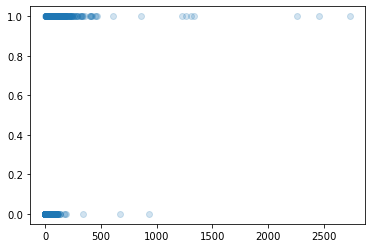

In [12]:
plt.scatter(df['차입금/자기자본'],df['신용등급(종속변수)'],alpha=0.2)
plt.show()

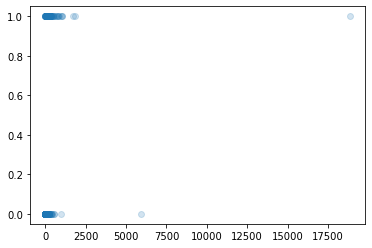

In [13]:
plt.scatter(df['차입금/매출액'],df['신용등급(종속변수)'],alpha=0.2)
plt.show()

### 결측치 확인. 결측치 없음.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc213c8a580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc213c8abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc213c8a130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc213c96340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc213c966d0>],
 'means': []}

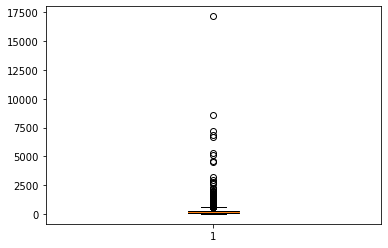

In [14]:
plt.boxplot(x='유동비율',data=df)

### 이상치가 너무 많음

In [15]:
np.mean(df['유동비율'])

300.38419864559825

In [16]:
quantile_25 = np.quantile(df['유동비율'], 0.25)
quantile_25

98.04999999999998

In [17]:
quantile_75 = np.quantile(df['유동비율'], 0.75)
quantile_75

294.22499999999997

In [18]:
IQR = quantile_75 - quantile_25

In [19]:
minimum = quantile_25 - 1.5 * IQR

In [20]:
maximum = quantile_75 + 1.5 * IQR

In [21]:
df11 = df[(minimum <= df['유동비율']) & (df['유동비율'] <= maximum)]
df11

,기업명,신용평점,신용등급(종속변수),유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
0,성지건설(주),7.0,1,115.7,104.9,120.1,-118.7,18.7,7.1,-4.4,-20.2,-20.7,9.0,1.2,1.1,-12.1,-10.6,-24.0
1,(주)피에스엠씨,7.0,1,199.3,153.2,45.8,-77.9,9.1,16.7,-19.8,-40.5,-26.7,5.0,6.1,0.5,-8.5,-17.2,-13.2
2,(주)체시스,7.0,1,76.7,67.1,143.7,1.3,100.8,79.8,0.5,-11.9,73.2,12.8,4.5,0.6,0.5,0.9,1.4
3,(주)스틸플라워,9.0,1,47.4,35.5,198.0,-2.9,166.6,214.8,-17.9,-43.6,6.7,3.4,1.7,0.3,-25.9,-98.7,-72.9
4,(주)형지아이앤씨,7.0,1,152.2,37.9,101.2,0.2,47.0,23.2,-2.4,9.1,29.7,2.5,8.9,1.2,-4.0,-3.5,-8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,두산엔진(주),8.0,1,64.9,34.3,147.4,0.7,56.5,39.3,0.5,16.2,29.7,4.0,11.7,0.6,-2.1,-3.6,-5.3
1768,신대양제지(주),3.0,0,362.8,306.3,27.7,32.9,3.9,4.0,2.7,-3.3,-16.0,15.9,7.8,0.7,2.0,2.8,2.5
1769,(주)신화콘텍,6.0,1,149.5,114.8,83.2,1.0,71.2,66.0,19.0,-4.8,5.5,6.1,3.9,0.5,0.9,1.6,1.5
1770,에프엔에스테크(주),5.0,0,128.3,86.6,124.3,22.9,39.4,16.3,45.5,44.9,196.2,7.1,14.2,1.5,18.8,12.8,43.1


In [22]:
quantile_25_ = np.quantile(df['영업이익이자보상비율'], 0.25)
quantile_75_ = np.quantile(df['영업이익이자보상비율'], 0.75)
IQR_ = quantile_75_ - quantile_25_
minimum_ = quantile_25_ - 1.5 * IQR_
maximum_ = quantile_75_ + 1.5 * IQR_
df12 = df[(minimum_ <= df['영업이익이자보상비율']) & (df['영업이익이자보상비율'] <= maximum_)]
df12

,기업명,신용평점,신용등급(종속변수),유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
2,(주)체시스,7.0,1,76.7,67.1,143.7,1.3,100.8,79.8,0.5,-11.9,73.2,12.8,4.5,0.6,0.5,0.9,1.4
3,(주)스틸플라워,9.0,1,47.4,35.5,198.0,-2.9,166.6,214.8,-17.9,-43.6,6.7,3.4,1.7,0.3,-25.9,-98.7,-72.9
4,(주)형지아이앤씨,7.0,1,152.2,37.9,101.2,0.2,47.0,23.2,-2.4,9.1,29.7,2.5,8.9,1.2,-4.0,-3.5,-8.5
6,(주)화이브라더스코리아,5.0,0,1137.3,1088.2,29.5,-0.9,20.7,18.9,133.7,32.0,-1.0,14.9,15.2,0.7,-1.3,-1.9,-1.7
7,아이원스(주),6.0,1,52.7,31.6,140.5,1.7,107.6,95.6,27.0,22.5,-77.2,6.1,4.6,0.4,1.5,3.5,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,두산엔진(주),8.0,1,64.9,34.3,147.4,0.7,56.5,39.3,0.5,16.2,29.7,4.0,11.7,0.6,-2.1,-3.6,-5.3
1768,신대양제지(주),3.0,0,362.8,306.3,27.7,32.9,3.9,4.0,2.7,-3.3,-16.0,15.9,7.8,0.7,2.0,2.8,2.5
1769,(주)신화콘텍,6.0,1,149.5,114.8,83.2,1.0,71.2,66.0,19.0,-4.8,5.5,6.1,3.9,0.5,0.9,1.6,1.5
1770,에프엔에스테크(주),5.0,0,128.3,86.6,124.3,22.9,39.4,16.3,45.5,44.9,196.2,7.1,14.2,1.5,18.8,12.8,43.1


### 사용하지 않을 변수 제거 (기업명,신용평점)
### 신용평점은 모든 또는 거의 모든 값이 이항 결과값 중 하나와 연관되어있어 로지스틱 회귀분석이 안돌아가기때문에 제거

In [26]:
df_= df.drop(['기업명','신용평점','신용등급(종속변수)'], axis=1)
df_

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
0,115.7,104.9,120.1,-118.7,18.7,7.1,-4.4,-20.2,-20.7,9.0,1.2,1.1,-12.1,-10.6,-24.0
1,199.3,153.2,45.8,-77.9,9.1,16.7,-19.8,-40.5,-26.7,5.0,6.1,0.5,-8.5,-17.2,-13.2
2,76.7,67.1,143.7,1.3,100.8,79.8,0.5,-11.9,73.2,12.8,4.5,0.6,0.5,0.9,1.4
3,47.4,35.5,198.0,-2.9,166.6,214.8,-17.9,-43.6,6.7,3.4,1.7,0.3,-25.9,-98.7,-72.9
4,152.2,37.9,101.2,0.2,47.0,23.2,-2.4,9.1,29.7,2.5,8.9,1.2,-4.0,-3.5,-8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,64.9,34.3,147.4,0.7,56.5,39.3,0.5,16.2,29.7,4.0,11.7,0.6,-2.1,-3.6,-5.3
1768,362.8,306.3,27.7,32.9,3.9,4.0,2.7,-3.3,-16.0,15.9,7.8,0.7,2.0,2.8,2.5
1769,149.5,114.8,83.2,1.0,71.2,66.0,19.0,-4.8,5.5,6.1,3.9,0.5,0.9,1.6,1.5
1770,128.3,86.6,124.3,22.9,39.4,16.3,45.5,44.9,196.2,7.1,14.2,1.5,18.8,12.8,43.1


### 이상치가 많기 때문에 정규화전에 표준화 먼저 함.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

df__1 = scaler.fit_transform(df_)

In [25]:
df__1

array([[-0.28389345, -0.23981392,  0.11166345, ..., -0.74478848,
        -0.03200637, -0.55412002],
       [-0.15538493, -0.16381719, -0.23689327, ..., -0.53699871,
        -0.07177655, -0.29184206],
       [-0.3438436 , -0.29928962,  0.22237595, ..., -0.01752428,
         0.03729015,  0.06271888],
       ...,
       [-0.23193666, -0.22423695, -0.06144211, ...,  0.00556347,
         0.0415082 ,  0.06514738],
       [-0.26452494, -0.26860771,  0.13136652, ...,  1.03874039,
         0.10899699,  1.07540321],
       [-0.05377712, -0.16775077, -0.24111536, ...,  0.21912518,
         0.06862424,  0.18657236]])

In [25]:
df__1 = pd.DataFrame(data=df__1, columns=df_.columns)
df__1

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403


In [26]:
df__1.describe()

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
count,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03,1.772000e+03
mean,-9.268827e-17,2.772425e-18,7.314816e-18,7.150350e-18,3.366068e-17,5.513523e-18,5.826791e-18,-1.603542e-17,-8.826336e-18,-3.767443e-17,-4.552964e-17,-1.202285e-16,-1.409708e-19,-4.164903e-17,-1.002459e-17
std,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00
min,-4.600547e-01,-4.031361e-01,-4.503432e-01,-4.153607e+01,-4.053941e-01,-1.291858e-01,-2.297580e+00,-1.052988e+00,-1.267493e-01,-5.963051e-02,-5.700102e-02,-1.591321e+00,-1.749495e+01,-2.034071e+01,-2.217991e+01
25%,-3.110247e-01,-2.889443e-01,-3.144155e-01,1.250386e-02,-3.310723e-01,-1.098116e-01,-3.555078e-01,-2.291235e-01,-9.184712e-02,-5.803596e-02,-4.959778e-02,-6.164139e-01,-6.369979e-02,2.945663e-02,1.354176e-02
50%,-2.164111e-01,-2.038610e-01,-1.662906e-01,1.254917e-02,-1.873085e-01,-7.842647e-02,-2.090525e-01,-1.234998e-01,-7.655345e-02,-5.674914e-02,-4.592441e-02,-2.264512e-01,1.094584e-01,5.355977e-02,1.380024e-01
75%,-9.467817e-03,-1.693738e-02,5.783184e-02,1.280159e-02,5.742793e-02,-2.364609e-02,5.062887e-02,3.439327e-04,-5.506320e-02,-5.276977e-02,-4.004702e-02,5.534741e-01,3.186911e-01,8.368870e-02,2.739983e-01
max,2.592570e+01,2.650333e+01,2.555490e+01,5.756930e+00,2.012168e+01,3.925837e+01,1.516137e+01,2.575008e+01,3.672544e+01,4.054491e+01,3.905632e+01,6.987858e+00,1.126084e+01,2.842295e+01,5.449131e+00


In [27]:
print(df__1.describe())
print(df__1.describe(include = object))

               유동비율          당좌비율          부채비율    영업이익이자보상비율      차입금/자기자본  \
count  1.772000e+03  1.772000e+03  1.772000e+03  1.772000e+03  1.772000e+03   
mean  -9.268827e-17  2.772425e-18  7.314816e-18  7.150350e-18  3.366068e-17   
std    1.000282e+00  1.000282e+00  1.000282e+00  1.000282e+00  1.000282e+00   
min   -4.600547e-01 -4.031361e-01 -4.503432e-01 -4.153607e+01 -4.053941e-01   
25%   -3.110247e-01 -2.889443e-01 -3.144155e-01  1.250386e-02 -3.310723e-01   
50%   -2.164111e-01 -2.038610e-01 -1.662906e-01  1.254917e-02 -1.873085e-01   
75%   -9.467817e-03 -1.693738e-02  5.783184e-02  1.280159e-02  5.742793e-02   
max    2.592570e+01  2.650333e+01  2.555490e+01  5.756930e+00  2.012168e+01   

            차입금/매출액        총자산증가율        매출액증가율        순이익증가율       재고자산회전율  \
count  1.772000e+03  1.772000e+03  1.772000e+03  1.772000e+03  1.772000e+03   
mean   5.513523e-18  5.826791e-18 -1.603542e-17 -8.826336e-18 -3.767443e-17   
std    1.000282e+00  1.000282e+00  1.000282e+00  1.

ValueError: No objects to concatenate

### 독립변수 표준화 후 종속변수 추가

In [28]:
add_col=df['신용등급(종속변수)'].values
df__1['신용등급(종속변수)']=add_col
df__1

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


## 1.5 IQR로 했을 때 이상치가 너무 많아서 전체변수 +-10 IQR로 임의로 지정해줘서 제거.

In [29]:
quantile_25 = np.quantile(df__1['유동비율'], 0.25)
quantile_75 = np.quantile(df__1['유동비율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df10 = df__1[(minimum <= df__1['유동비율']) & (df__1['유동비율'] <= maximum)]
df10

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [30]:
quantile_25 = np.quantile(df10['당좌비율'], 0.25)
quantile_75 = np.quantile(df10['당좌비율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df11 = df10[(minimum <= df10['유동비율']) & (df10['유동비율'] <= maximum)]
df11

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [31]:
quantile_25 = np.quantile(df11['부채비율'], 0.25)
quantile_75 = np.quantile(df11['부채비율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df12 = df11[(minimum <= df11['부채비율']) & (df11['부채비율'] <= maximum)]
df12

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [32]:
quantile_25 = np.quantile(df12['영업이익이자보상비율'], 0.25)
quantile_75 = np.quantile(df12['영업이익이자보상비율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df13 = df12[(minimum <= df12['영업이익이자보상비율']) & (df12['영업이익이자보상비율'] <= maximum)]
df13

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [33]:
quantile_25 = np.quantile(df13['차입금/자기자본'], 0.25)
quantile_75 = np.quantile(df13['차입금/자기자본'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df14 = df13[(minimum <= df13['차입금/자기자본']) & (df13['차입금/자기자본'] <= maximum)]
df14

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [34]:
quantile_25 = np.quantile(df14['차입금/매출액'], 0.25)
quantile_75 = np.quantile(df14['차입금/매출액'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df15 = df14[(minimum <= df14['차입금/매출액']) & (df14['차입금/매출액'] <= maximum)]
df15

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [35]:
quantile_25 = np.quantile(df15['총자산증가율'], 0.25)
quantile_75 = np.quantile(df15['총자산증가율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df16 = df15[(minimum <= df15['총자산증가율']) & (df15['총자산증가율'] <= maximum)]
df16

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [36]:
quantile_25 = np.quantile(df16['매출액증가율'], 0.25)
quantile_75 = np.quantile(df16['매출액증가율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df17 = df16[(minimum <= df16['매출액증가율']) & (df16['매출액증가율'] <= maximum)]
df17

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [37]:
quantile_25 = np.quantile(df17['순이익증가율'], 0.25)
quantile_75 = np.quantile(df17['순이익증가율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df18 = df17[(minimum <= df17['순이익증가율']) & (df17['순이익증가율'] <= maximum)]
df18

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [38]:
quantile_25 = np.quantile(df18['재고자산회전율'], 0.25)
quantile_75 = np.quantile(df18['재고자산회전율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df19 = df18[(minimum <= df18['재고자산회전율']) & (df18['재고자산회전율'] <= maximum)]
df19

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [39]:
quantile_25 = np.quantile(df19['매출채권회전율'], 0.25)
quantile_75 = np.quantile(df19['매출채권회전율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df20 = df19[(minimum <= df19['매출채권회전율']) & (df19['매출채권회전율'] <= maximum)]
df20

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [40]:
quantile_25 = np.quantile(df20['총자본회전율'], 0.25)
quantile_75 = np.quantile(df20['총자본회전율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df21 = df20[(minimum <= df20['총자본회전율']) & (df20['총자본회전율'] <= maximum)]
df21

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [41]:
quantile_25 = np.quantile(df21['총자본순이익율'], 0.25)
quantile_75 = np.quantile(df21['총자본순이익율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df22 = df21[(minimum <= df21['총자본순이익율']) & (df21['총자본순이익율'] <= maximum)]
df22

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
3,-0.388883,-0.349010,0.477109,0.012471,0.845314,0.319502,-0.771490,-0.612538,-0.075643,-0.058707,-0.053384,-1.006377,-1.541316,-0.562878,-1.741656,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [42]:
quantile_25 = np.quantile(df22['매출액순이익율'], 0.25)
quantile_75 = np.quantile(df22['매출액순이익율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df23 = df22[(minimum <= df22['매출액순이익율']) & (df22['매출액순이익율'] <= maximum)]
df23

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
5,0.069659,-0.152174,-0.367309,0.013496,-0.372362,-0.121875,-0.121672,0.010642,-0.091847,-0.058931,-0.027840,-0.226451,0.282617,0.080073,0.191429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


In [43]:
quantile_25 = np.quantile(df23['자기자본순이익율'], 0.25)
quantile_75 = np.quantile(df23['자기자본순이익율'], 0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 10 * IQR
maximum = quantile_75 + 10 * IQR
df24 = df23[(minimum <= df23['자기자본순이익율']) & (df23['자기자본순이익율'] <= maximum)]
df24

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120,1
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842,1
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719,1
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703,1
5,0.069659,-0.152174,-0.367309,0.013496,-0.372362,-0.121875,-0.121672,0.010642,-0.091847,-0.058931,-0.027840,-0.226451,0.282617,0.080073,0.191429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991,1
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432,0
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147,1
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403,0


### 이상치 제거후 독립변수간의 상관분석

In [44]:
df25= df24.drop(['신용등급(종속변수)'], axis=1)

In [45]:
df25

,유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
0,-0.283893,-0.239814,0.111663,0.011400,-0.265009,-0.114355,-0.439197,-0.365378,-0.088779,-0.057141,-0.054514,0.553474,-0.744788,-0.032006,-0.554120
1,-0.155385,-0.163817,-0.236893,0.011777,-0.337078,-0.094302,-0.818257,-0.579794,-0.091655,-0.058260,-0.043438,-0.616414,-0.536999,-0.071777,-0.291842
2,-0.343844,-0.299290,0.222376,0.012509,0.351337,0.037505,-0.318586,-0.277710,-0.043761,-0.056078,-0.047055,-0.421433,-0.017524,0.037290,0.062719
4,-0.227786,-0.345234,0.023000,0.012499,-0.052553,-0.080724,-0.389968,-0.055901,-0.064616,-0.058959,-0.037108,0.748455,-0.277261,0.010777,-0.177703
5,0.069659,-0.152174,-0.367309,0.013496,-0.372362,-0.121875,-0.121672,0.010642,-0.091847,-0.058931,-0.027840,-0.226451,0.282617,0.080073,0.191429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,-0.361982,-0.350898,0.239733,0.012504,0.018766,-0.047094,-0.318586,0.019092,-0.064616,-0.058540,-0.030779,-0.421433,-0.167595,0.010174,-0.099991
1768,0.095945,0.077075,-0.321804,0.012802,-0.376116,-0.120830,-0.264435,-0.186874,-0.086525,-0.055211,-0.039595,-0.226451,0.069055,0.048739,0.089432
1769,-0.231937,-0.224237,-0.061442,0.012507,0.129122,0.008679,0.136779,-0.202718,-0.076218,-0.057952,-0.048411,-0.616414,0.005563,0.041508,0.065147
1770,-0.264525,-0.268608,0.131367,0.012709,-0.109608,-0.095137,0.789059,0.322232,0.015209,-0.057672,-0.025128,1.333399,1.038740,0.108997,1.075403


In [46]:
plt.rcParams['font.family'] = 'AppleGothic'

In [47]:
df25corr=df25.corr()

/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

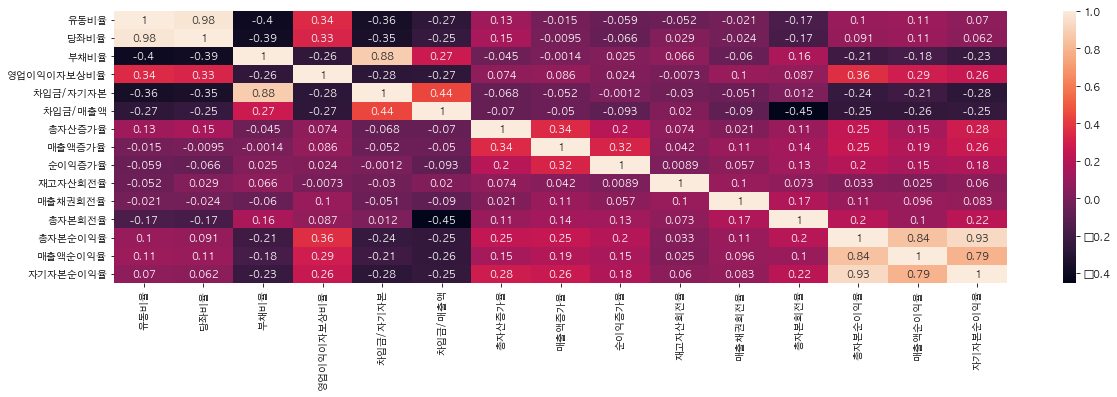

In [48]:
plt.rcParams['figure.figsize'] = [20, 5]
sns.heatmap(df25corr,annot = True)

### 독립변수간에 상관성이 높은게 몇개 보여서 다중공선성을 의심해봐야한다.

 ### VIF는 variance inflation factor의 줄임말로, 다중공선성을 확인할 때 쓰는 지표 중 하나다. variance inflation factor는 말그대로 "분산팽창요인"이다. 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단한다. 하지만, 다른 과정을 함께 거쳐주는 것이 다중공선성 문제 확인의 신뢰성을 높인다.

In [49]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df25.values, i) for i in range(df25.shape[1])]
vif["features"] = df25.columns
vif

,VIF Factor,features
0,27.806396,유동비율
1,28.633552,당좌비율
2,5.524032,부채비율
3,68.082477,영업이익이자보상비율
4,5.875069,차입금/자기자본
5,2.634250,차입금/매출액
6,1.302396,총자산증가율
7,1.374364,매출액증가율
8,3.024112,순이익증가율
9,62.390585,재고자산회전율


In [50]:
df25= df25.drop(['영업이익이자보상비율'], axis=1)

In [51]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df25.values, i) for i in range(df25.shape[1])]
vif["features"] = df25.columns
vif

,VIF Factor,features
0,25.807572,유동비율
1,26.521131,당좌비율
2,5.481585,부채비율
3,5.797598,차입금/자기자본
4,2.631603,차입금/매출액
5,1.302388,총자산증가율
6,1.371893,매출액증가율
7,2.951558,순이익증가율
8,17.695212,재고자산회전율
9,15.053239,매출채권회전율


In [52]:
df25= df25.drop(['당좌비율'], axis=1)

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df25.values, i) for i in range(df25.shape[1])]
vif["features"] = df25.columns
vif

,VIF Factor,features
0,1.474751,유동비율
1,5.479573,부채비율
2,5.794184,차입금/자기자본
3,2.628710,차입금/매출액
4,1.271073,총자산증가율
5,1.371560,매출액증가율
6,2.924873,순이익증가율
7,16.638537,재고자산회전율
8,14.659825,매출채권회전율
9,1.672569,총자본회전율


In [54]:
df25= df25.drop(['재고자산회전율'], axis=1)

In [55]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df25.values, i) for i in range(df25.shape[1])]
vif["features"] = df25.columns
vif

,VIF Factor,features
0,1.444702,유동비율
1,5.191376,부채비율
2,5.536246,차입금/자기자본
3,2.520040,차입금/매출액
4,1.270434,총자산증가율
5,1.359776,매출액증가율
6,2.743534,순이익증가율
7,3.373966,매출채권회전율
8,1.667722,총자본회전율
9,10.347156,총자본순이익율


In [56]:
df25= df25.drop(['총자본순이익율'], axis=1)

In [57]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df25.values, i) for i in range(df25.shape[1])]
vif["features"] = df25.columns
vif

,VIF Factor,features
0,1.429134,유동비율
1,5.185968,부채비율
2,5.521037,차입금/자기자본
3,2.518029,차입금/매출액
4,1.270014,총자산증가율
5,1.359543,매출액증가율
6,2.721034,순이익증가율
7,3.293495,매출채권회전율
8,1.658394,총자본회전율
9,3.288931,매출액순이익율


## 표준화 후 이상치와 VIF처리완료. 나머지 데이터 정규화 

In [58]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(df25)

# 데이터 변환
df31 = mMscaler.transform(df25)

# 데이터 프레임으로 저장
df31 = pd.DataFrame(data=df31, columns=df25.columns)

In [59]:
df31

,유동비율,부채비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,매출채권회전율,총자본회전율,매출액순이익율,자기자본순이익율
0,0.056653,0.168445,0.040502,0.015338,0.242451,0.195666,0.097074,0.018717,0.250000,0.418577,0.451333
1,0.100711,0.061292,0.019710,0.036077,0.174067,0.129022,0.089636,0.149733,0.113636,0.378770,0.518289
2,0.036100,0.202481,0.218324,0.172391,0.264210,0.222915,0.213489,0.106952,0.136364,0.487937,0.608803
3,0.075889,0.141188,0.101798,0.050119,0.251332,0.291858,0.159559,0.224599,0.272727,0.461399,0.547427
4,0.177866,0.021200,0.009530,0.007561,0.299734,0.312541,0.089140,0.334225,0.159091,0.530760,0.641662
...,...,...,...,...,...,...,...,...,...,...,...
1310,0.029881,0.207817,0.122374,0.084900,0.264210,0.315167,0.159559,0.299465,0.136364,0.460796,0.567266
1311,0.186877,0.035189,0.008447,0.008641,0.273979,0.251149,0.102901,0.195187,0.159091,0.499397,0.615623
1312,0.074466,0.115229,0.154213,0.142579,0.346359,0.246225,0.129556,0.090909,0.113636,0.492159,0.609423
1313,0.063294,0.174502,0.085337,0.035213,0.464032,0.409389,0.365981,0.366310,0.340909,0.559710,0.867328


In [60]:
df31.describe()

,유동비율,부채비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,매출채권회전율,총자본회전율,매출액순이익율,자기자본순이익율
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,0.117570,0.123011,0.106724,0.080260,0.307041,0.282913,0.158707,0.150310,0.192482,0.490619,0.614583
std,0.128906,0.122502,0.118445,0.091263,0.104845,0.100866,0.133274,0.132733,0.107777,0.093277,0.103142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.047642,0.043914,0.028482,0.025059,0.257549,0.238674,0.087776,0.074866,0.113636,0.482509,0.600434
50%,0.075152,0.091145,0.076240,0.053359,0.283304,0.268549,0.125341,0.114973,0.181818,0.502413,0.628022
75%,0.133755,0.161451,0.144466,0.102830,0.325933,0.305318,0.178465,0.173797,0.250000,0.528046,0.659950
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 정규화한 데이터에 종속변수 추가

In [75]:
add_col=df24['신용등급(종속변수)'].values
df31['신용등급(종속변수)']=add_col
df31

,유동비율,부채비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,매출채권회전율,총자본회전율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,0.056653,0.168445,0.040502,0.015338,0.242451,0.195666,0.097074,0.018717,0.250000,0.418577,0.451333,1
1,0.100711,0.061292,0.019710,0.036077,0.174067,0.129022,0.089636,0.149733,0.113636,0.378770,0.518289,1
2,0.036100,0.202481,0.218324,0.172391,0.264210,0.222915,0.213489,0.106952,0.136364,0.487937,0.608803,1
3,0.075889,0.141188,0.101798,0.050119,0.251332,0.291858,0.159559,0.224599,0.272727,0.461399,0.547427,1
4,0.177866,0.021200,0.009530,0.007561,0.299734,0.312541,0.089140,0.334225,0.159091,0.530760,0.641662,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1310,0.029881,0.207817,0.122374,0.084900,0.264210,0.315167,0.159559,0.299465,0.136364,0.460796,0.567266,1
1311,0.186877,0.035189,0.008447,0.008641,0.273979,0.251149,0.102901,0.195187,0.159091,0.499397,0.615623,0
1312,0.074466,0.115229,0.154213,0.142579,0.346359,0.246225,0.129556,0.090909,0.113636,0.492159,0.609423,1
1313,0.063294,0.174502,0.085337,0.035213,0.464032,0.409389,0.365981,0.366310,0.340909,0.559710,0.867328,0


In [76]:
df31= sm.add_constant(df31,has_constant = "add")
df31.head()

/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,유동비율,부채비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,매출채권회전율,총자본회전율,매출액순이익율,자기자본순이익율,신용등급(종속변수)
0,1.0,0.056653,0.168445,0.040502,0.015338,0.242451,0.195666,0.097074,0.018717,0.250000,0.418577,0.451333,1
1,1.0,0.100711,0.061292,0.019710,0.036077,0.174067,0.129022,0.089636,0.149733,0.113636,0.378770,0.518289,1
2,1.0,0.036100,0.202481,0.218324,0.172391,0.264210,0.222915,0.213489,0.106952,0.136364,0.487937,0.608803,1
3,1.0,0.075889,0.141188,0.101798,0.050119,0.251332,0.291858,0.159559,0.224599,0.272727,0.461399,0.547427,1
4,1.0,0.177866,0.021200,0.009530,0.007561,0.299734,0.312541,0.089140,0.334225,0.159091,0.530760,0.641662,0


### 로지스틱 회귀분석 후 유의확률 높은 변수 2개제거 

In [77]:
df31= df31.drop(['총자본회전율'], axis=1)

In [78]:
df31= df31.drop(['매출액순이익율'], axis=1)

### 차입금 변수 1개만 남겨놓기.

In [60]:
df31=df31.drop(['차입금/자기자본'],axis=1)

In [61]:
feature_columns = df31.columns.difference(['신용등급(종속변수)'])
x = df31[feature_columns]
y = df31['신용등급(종속변수)']

In [62]:
model = sm.Logit(y ,x)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.307445
         Iterations 8


In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1315
Model:                          Logit   Df Residuals:                     1306
Method:                           MLE   Df Model:                            8
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.5384
Time:                        15:49:04   Log-Likelihood:                -404.29
converged:                       True   LL-Null:                       -875.79
Covariance Type:            nonrobust   LLR p-value:                2.978e-198
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9213      1.232     10.490      0.000      10.507      15.336
매출액증가율         2.2667      1.019      2.224      0.026       0.269       4.264
매출채권회전율       -2.6962      0.788     -3.423      0.001      -4.240      -1.152
부채비율          18.0200      1.582     11.388      0.000      14.919      21.121
순이익증가율         2.4953      0.657      3.799      0.000       1.208       3.782
유동비율          -5.4603      1.574     -3.470      0.001      -8.544      -2.376
자기자본순이익율     -28.2710      2.167    -13.044      0.000     -32.519     -24.023
차입금/매출액        6.4537      1.238      5.215      0.000       4.028       8.879
총자산증가율         4.3588      1.104      3.947      0.000       2.194       6.523
==============================================================================
"""

## Pseudo R-squ(R제곱)이 0.5384이다. 로지스틱 회귀분석에서는 보통 R제곱값은 낮게 나온다. R제곱에 의존할 필요는 없다.
### P>|t|(유의확률)은 독립변수의 유의확률이다. 보통 독립변수가 95%의 신뢰도를 가져야 유의미하다고 판단한다. 이 경우 독립변수의 유의확률은 0.05보다 작은 값이 산출된다. 즉, 독립변수의 유의확률이 0.05보다 작으면, 독립변수가 종속변수에 영향을 미치는 것이 유의미하다고 본다

## 선택한 변수로 교차검증 (Cross Valildation)
### 결과값 정리

In [66]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# 로지스틱 회귀 교차 검증
accuracy = cross_val_score(logreg, x, y, cv=5, scoring='accuracy')
precision = cross_val_score(logreg, x, y, cv=5, scoring='precision')
recall = cross_val_score(logreg, x, y, cv=5, scoring='recall')
roc_auc = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')

# 정확도, 정밀도, 재현율 , AUC 평균값
print('정확도 : ',accuracy.mean())
print('정밀도 : ',precision.mean())
print('재현율 : ',recall.mean())
print('AUC : ',roc_auc.mean())

정확도 :  0.8425855513307985
정밀도 :  0.9013350277101203
재현율 :  0.6633663366336634
AUC :  0.9313898056472313


### 정확도(5개 나열한거)

In [67]:
print("정확도: {}".format(accuracy))

정확도: [0.82889734 0.84410646 0.85931559 0.86311787 0.81749049]


In [68]:
result=list(map(lambda x:'{score:.2f}'.format(score=x),accuracy))
result

['0.83', '0.84', '0.86', '0.86', '0.82']

In [69]:
accuracy.mean()

0.8425855513307985

### AUC (5개 나열한거)

In [70]:
print("AUC : {}".format(roc_auc))

AUC : [0.92757609 0.91969197 0.94450556 0.96222956 0.90294585]


In [769]:
roc_auc.mean()

0.9313898056472313

### 밑에는 정규화후 VIF제거인데 쓸모없음. 안봐도됨.

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,48.157477,유동비율
1,45.032428,당좌비율
2,11.236892,부채비율
3,24.595503,영업이익이자보상비율
4,10.583155,차입금/자기자본
5,3.339107,차입금/매출액
6,12.254642,총자산증가율
7,11.458123,매출액증가율
8,2.855495,순이익증가율
9,1.816795,재고자산회전율


### vif가 높은 변수가 하나씩 줄어들면 다른 변수들의 vif에도 영향을 미친다. 그래서 변수들을 한 번에 다 제거하기보다는 하나씩 제거하면서 확인해 나아가는 것이 바람직하다.

In [191]:
df26= df26.drop(['총자본순이익율'], axis=1)

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,48.143881,유동비율
1,45.032407,당좌비율
2,11.236882,부채비율
3,24.016003,영업이익이자보상비율
4,10.547058,차입금/자기자본
5,3.338989,차입금/매출액
6,12.252904,총자산증가율
7,11.457725,매출액증가율
8,2.812995,순이익증가율
9,1.812848,재고자산회전율


In [193]:
df26 = df26.drop(['자기자본순이익율'], axis=1)

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,47.876745,유동비율
1,44.677980,당좌비율
2,11.222335,부채비율
3,23.189412,영업이익이자보상비율
4,10.529587,차입금/자기자본
5,3.190619,차입금/매출액
6,11.330741,총자산증가율
7,11.295533,매출액증가율
8,2.812331,순이익증가율
9,1.804181,재고자산회전율


In [195]:
df26 = df26.drop(['유동비율'], axis=1)

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,2.467785,당좌비율
1,11.211939,부채비율
2,22.722101,영업이익이자보상비율
3,10.528935,차입금/자기자본
4,3.179322,차입금/매출액
5,11.259339,총자산증가율
6,11.295377,매출액증가율
7,2.809674,순이익증가율
8,1.578268,재고자산회전율
9,2.465744,매출채권회전율


In [197]:
df26 = df26.drop(['매출액순이익율'], axis=1)

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,2.467530,당좌비율
1,11.199624,부채비율
2,13.715686,영업이익이자보상비율
3,10.521844,차입금/자기자본
4,3.137150,차입금/매출액
5,10.707849,총자산증가율
6,10.825782,매출액증가율
7,2.784972,순이익증가율
8,1.576361,재고자산회전율
9,2.460370,매출채권회전율


In [199]:
df26 = df26.drop(['영업이익이자보상비율'], axis=1)

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,2.021508,당좌비율
1,11.183909,부채비율
2,10.515760,차입금/자기자본
3,2.946128,차입금/매출액
4,9.960018,총자산증가율
5,9.900517,매출액증가율
6,2.782035,순이익증가율
7,1.576009,재고자산회전율
8,2.393749,매출채권회전율
9,5.409322,총자본회전율


In [201]:
df26 = df26.drop(['부채비율'], axis=1)

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,1.977757,당좌비율
1,2.914108,차입금/자기자본
2,2.812753,차입금/매출액
3,9.958680,총자산증가율
4,9.820408,매출액증가율
5,2.780619,순이익증가율
6,1.502429,재고자산회전율
7,2.371960,매출채권회전율
8,5.188827,총자본회전율
9,2.321377,신용등급(종속변수)


In [203]:
df26 = df26.drop(['총자산증가율'], axis=1)

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df26.values, i) for i in range(df26.shape[1])]
vif["features"] = df26.columns
vif

,VIF Factor,features
0,1.713511,당좌비율
1,2.913419,차입금/자기자본
2,2.693092,차입금/매출액
3,7.612410,매출액증가율
4,2.730342,순이익증가율
5,1.496144,재고자산회전율
6,2.370169,매출채권회전율
7,4.679505,총자본회전율
8,2.313937,신용등급(종속변수)


In [205]:
df26

,당좌비율,차입금/자기자본,차입금/매출액,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,신용등급(종속변수)
0,0.062504,0.040502,0.015338,0.195666,0.097074,0.046322,0.018717,0.250000,1
1,0.091814,0.019710,0.036077,0.129022,0.089636,0.024523,0.149733,0.113636,1
2,0.039566,0.218324,0.172391,0.222915,0.213489,0.067030,0.106952,0.136364,1
3,0.021846,0.101798,0.050119,0.291858,0.159559,0.010899,0.224599,0.272727,1
4,0.096304,0.009530,0.007561,0.312541,0.089140,0.011444,0.334225,0.159091,0
...,...,...,...,...,...,...,...,...,...
1310,0.019661,0.122374,0.084900,0.315167,0.159559,0.019074,0.299465,0.136364,1
1311,0.184720,0.008447,0.008641,0.251149,0.102901,0.083924,0.195187,0.159091,0
1312,0.068511,0.154213,0.142579,0.246225,0.129556,0.030518,0.090909,0.113636,1
1313,0.051399,0.085337,0.035213,0.409389,0.365981,0.035967,0.366310,0.340909,0


## VIF 까지 총 9개 변수 제거

## 로지스틱 회귀분석
###  후진소거법으로 독립변수의 유의확률 확인한 결과 독립변수 4개 추가 제거 필요.

##### 후진소거법:  모든 독립변수를 포함한 모형에서 출발해  가장 적은 영향을 주는 변수부터 하나씩 제거하면서 더 이상 제거할 변수가 없을 때까지 진행.

In [206]:
df26 = df26.drop(['매출액증가율','총자본회전율','재고자산회전율','순이익증가율'], axis=1)

In [696]:
df= df.drop(['기업명','신용평점'], axis=1)

In [697]:
df= sm.add_constant(df,has_constant = "add")
df.head()

/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,신용등급(종속변수),유동비율,당좌비율,부채비율,영업이익이자보상비율,차입금/자기자본,차입금/매출액,총자산증가율,매출액증가율,순이익증가율,재고자산회전율,매출채권회전율,총자본회전율,총자본순이익율,매출액순이익율,자기자본순이익율
0,1.0,1,115.7,104.9,120.1,-118.7,18.7,7.1,-4.4,-20.2,-20.7,9.0,1.2,1.1,-12.1,-10.6,-24.0
1,1.0,1,199.3,153.2,45.8,-77.9,9.1,16.7,-19.8,-40.5,-26.7,5.0,6.1,0.5,-8.5,-17.2,-13.2
2,1.0,1,76.7,67.1,143.7,1.3,100.8,79.8,0.5,-11.9,73.2,12.8,4.5,0.6,0.5,0.9,1.4
3,1.0,1,47.4,35.5,198.0,-2.9,166.6,214.8,-17.9,-43.6,6.7,3.4,1.7,0.3,-25.9,-98.7,-72.9
4,1.0,1,152.2,37.9,101.2,0.2,47.0,23.2,-2.4,9.1,29.7,2.5,8.9,1.2,-4.0,-3.5,-8.5


In [698]:
feature_columns = df.columns.difference(['신용등급(종속변수)'])
x = df[feature_columns]
y = df['신용등급(종속변수)']

In [699]:
model = sm.Logit(y ,x)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.353472
         Iterations 11


In [700]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1772
Model:                          Logit   Df Residuals:                     1756
Method:                           MLE   Df Model:                           15
Date:                Thu, 26 May 2022   Pseudo R-squ.:                  0.4637
Time:                        15:26:08   Log-Likelihood:                -626.35
converged:                       True   LL-Null:                       -1167.9
Covariance Type:            nonrobust   LLR p-value:                2.126e-221
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3897      0.212     -6.540      0.000      -1.806      -0.973
당좌비율           0.0019      0.002      1.007      0.314      -0.002       0.006
매출액순이익율        0.0026      0.001      2.814      0.005       0.001       0.004
매출액증가율         0.0018      0.001      1.576      0.115      -0.000       0.004
매출채권회전율       -0.0108      0.007     -1.632      0.103      -0.024       0.002
부채비율           0.0150      0.002      6.023      0.000       0.010       0.020
순이익증가율        -0.0003      0.000     -1.470      0.142      -0.001       9e-05
영업이익이자보상비율  1.376e-06   1.26e-06      1.093      0.274   -1.09e-06    3.84e-06
유동비율          -0.0026      0.002     -1.415      0.157      -0.006       0.001
자기자본순이익율      -0.0784      0.019     -4.139      0.000      -0.116      -0.041
재고자산회전율       -0.0004      0.000     -1.717      0.086      -0.001     6.1e-05
차입금/매출액        0.0006      0.001      0.874      0.382      -0.001       0.002
차입금/자기자본       0.0142      0.004      4.020      0.000       0.007       0.021
총자본순이익율       -0.0580      0.031     -1.883      0.060      -0.118       0.002
총자본회전율        -0.6817      0.191     -3.569      0.000      -1.056      -0.307
총자산증가율         0.0093      0.002      3.969      0.000       0.005       0.014
==============================================================================
"""

In [701]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# 로지스틱 회귀 교차 검증
accuracy = cross_val_score(logreg, x, y, cv=5, scoring='accuracy')
precision = cross_val_score(logreg, x, y, cv=5, scoring='precision')
recall = cross_val_score(logreg, x, y, cv=5, scoring='recall')
roc_auc = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')

# 정확도, 정밀도, 재현율 , AUC 평균값
print('정확도 : ',accuracy.mean())
print('정밀도 : ',precision.mean())
print('재현율 : ',recall.mean())
print('AUC : ',roc_auc.mean())

/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

정확도 :  0.8442349009310097
정밀도 :  0.7991867931755556
재현율 :  0.7805343511450381
AUC :  0.905600977215712


/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [207]:
df26= sm.add_constant(df26,has_constant = "add")
df26.head()

/Users/idogeon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,당좌비율,차입금/자기자본,차입금/매출액,매출채권회전율,신용등급(종속변수)
0,1.0,0.062504,0.040502,0.015338,0.018717,1
1,1.0,0.091814,0.019710,0.036077,0.149733,1
2,1.0,0.039566,0.218324,0.172391,0.106952,1
3,1.0,0.021846,0.101798,0.050119,0.224599,1
4,1.0,0.096304,0.009530,0.007561,0.334225,0


In [208]:
feature_columns = df26.columns.difference(['신용등급(종속변수)'])
x = df26[feature_columns]
y = df26['신용등급(종속변수)']

## 로지스틱 회귀모형 모델링 y = F(x)

In [209]:
model = sm.Logit(y ,x)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.459780
         Iterations 7


### 뉴턴법/뉴턴-랩슨법은 현재 x값에서 접선을 그리고 접선이 x축과 만나는 지점으로 x를 이동시켜 가면서 점진적으로 해를 찾는 방법이다.

### 위의 결과값은 모델적합이 완료되었다는 결과

In [210]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1315
Model:                          Logit   Df Residuals:                     1310
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.3096
Time:                        10:13:08   Log-Likelihood:                -604.61
converged:                       True   LL-Null:                       -875.79
Covariance Type:            nonrobust   LLR p-value:                4.588e-116
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4762      0.228     -6.461      0.000      -1.924      -1.028
당좌비율          -3.9998      1.177     -3.397      0.001      -6.308      -1.692
매출채권회전율       -2.9224      0.685     -4.265      0.000      -4.265      -1.579
차입금/매출액        4.3527      0.993      4.382      0.000       2.406       6.299
차입금/자기자본      13.7791      1.245     11.070      0.000      11.340      16.219
==============================================================================
"""

###  Pseudo R-squ(R제곱)이 0.3096이다. 로지스틱 회귀분석에서는 보통 R제곱값은 낮게 나온다. R제곱에 의존할 필요는 없다.
###  P>|t|(유의확률)은 독립변수의 유의확률이다. 보통 독립변수가 95%의 신뢰도를 가져야 유의미하다고 판단한다. 이 경우 독립변수의 유의확률은 0.05보다 작은 값이 산출된다. 즉, 독립변수의 유의확률이 0.05보다 작으면, 독립변수가 종속변수에 영향을 미치는 것이 유의미하다고 본다.

## 선택한 변수로 교차검증 

In [211]:
feature_columns = df26.columns.difference(['신용등급(종속변수)'])
x = df26[feature_columns]
y = df26['신용등급(종속변수)']

### 결과값 정리

In [212]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# 로지스틱 회귀 교차 검증
accuracy = cross_val_score(logreg, x, y, cv=5, scoring='accuracy')
precision = cross_val_score(logreg, x, y, cv=5, scoring='precision')
recall = cross_val_score(logreg, x, y, cv=5, scoring='recall')
roc_auc = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')

# 정확도, 정밀도, 재현율 , AUC 평균값
print('정확도 : ',accuracy.mean())
print('정밀도 : ',precision.mean())
print('재현율 : ',recall.mean())
print('AUC : ',roc_auc.mean())

정확도 :  0.7787072243346008
정밀도 :  0.8004385509574539
재현율 :  0.5663366336633664
AUC :  0.8584036181395917


### 정확도(풀어놓은거)

In [1689]:
print("정확도: {}".format(accuracy))

정확도: [0.75665399 0.7756654  0.79087452 0.81368821 0.75665399]


In [1690]:
result=list(map(lambda x:'{score:.2f}'.format(score=x),accuracy))
result

['0.76', '0.78', '0.79', '0.81', '0.76']

In [1691]:
accuracy.mean()

0.7787072243346008

### AUC (풀어놓은거)

In [1692]:
print("AUC : {}".format(roc_auc))

AUC : [0.8264882  0.84164528 0.88742208 0.89732307 0.83913947]


In [1693]:
roc_auc.mean()

0.8584036181395917

# random_status 값을 None으로 설정하고 5번 돌리기 (변수값은 그대로)
### random_stauts = None으로 설정하는 이유는 학습데이터와 검증데이터를 추출할 때 마다 데이터를 새로 뽑기 때문이다.

In [1260]:
feature_columns = df11_.columns.difference(['신용등급(종속변수)'])
x = df11_[feature_columns]
y = df11_['신용등급(종속변수)']

x_train,x_test, y_train,y_test = train_test_split(x, y, stratify=y,train_size=0.8,test_size=0.2,random_state=None)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(1417, 5) (355, 5) (1417,) (355,)


In [1261]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.444618
         Iterations 10


In [1262]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1417
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.3255
Time:                        00:18:49   Log-Likelihood:                -630.02
converged:                       True   LL-Null:                       -934.12
Covariance Type:            nonrobust   LLR p-value:                2.620e-130
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3593      0.120     -2.990      0.003      -0.595      -0.124
당좌비율          -0.5696      0.208     -2.734      0.006      -0.978      -0.161
매출채권회전율       -4.7053      2.093     -2.248      0.025      -8.807      -0.604
차입금/자기자본       5.2423      0.349     15.001      0.000       4.557       5.927
총자본회전율        -0.5360      0.083     -6.434      0.000      -0.699      -0.373
==============================================================================
"""

### 위의 결과값을 보면 독립변수의 유의확률이 모두 0.05 아래로 독립변수가 종속변수에 영향을 미치는 것이 유의미하다고 볼 수 있다.

In [1263]:
results.params

const      -0.359301
당좌비율       -0.569585
매출채권회전율    -4.705258
차입금/자기자본    5.242338
총자본회전율     -0.536038
dtype: float64

### 모델적합으로 인해 위의 회귀계수가 출력되었다. 이는 아직 로지스틱의 log형태가 취해진 결과이기에 바로 확률로 해석하는 오류를 범해서는 안된다. 그렇기에 np.exp(results.params)의 결과를 확인할 필요가 있다.

In [1264]:
np.exp(results.params)

const         0.698164
당좌비율          0.565760
매출채권회전율       0.009048
차입금/자기자본    189.111727
총자본회전율        0.585061
dtype: float64

###  차입금/자기자본이 높을수록  불량일 확률이 1.04배 높다.

###  총자산증가율이 높을수록 불량일 확률이 1.007배 높다


### 이와 같은 방법을 통해서 직관적인 해석을 진행할 수 있다. 다음 y_hat을 예측해보자.

In [1265]:
pred_y = results.predict(x_test)
pred_y

1424    0.127285
458     0.029884
141     0.552497
850     0.601644
867     0.437833
          ...   
505     0.999374
1709    0.092913
729     0.175974
673     0.841800
1165    0.341629
Length: 355, dtype: float64

### 위의 결과는 0~1사이의 logit을 나타낸 결과이다. 신용등급 데이터는 0 또는 1의 이진형 변수인데 예측값은 다르게 나왔다. 이는 1이될 확률을 나타내는 결과이다. 그렇기에 우리는 이 logit에 임계값을 설정하여 임계값 이상은 =1 / 임계값 이하는 0으로 분류해줄 필요가 있다.

In [1266]:
def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1424    0
458     0
141     1
850     1
867     0
       ..
505     1
1709    0
729     0
673     1
1165    0
Length: 355, dtype: int64

### 위의 코드는 임계값을 0.5로 설정했다. 불량기업을 선별하기 위해서 임계값을 더 높게 설정할 수 있다. 보통은 0.5로 진행하지만, 상황과 용도에 따라 다르다. 

### 그리고 결과를 보면 0 또는 1의 이진형 변수로 분류된 것을 볼 수 있다. 

In [1267]:
# confusion matrix (분류 표를 나타낸 행렬)
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[193  31]
 [ 45  86]]


In [1268]:
# confusion matrix accuracy(정확도) 계산함수
def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.7859154929577464

## confusion matrix를 활용한 정확도는 예측한 것들 중에 옳게 분류한 것들의 비율을 나타낸다. 

### 즉, ( 예측-T,실제-T + 예측-F,실제-F / 전체 예측데이터 수 ) 이다.

In [1269]:
# 임계값 0~1에 따른 정확도 확인
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.369014
0.1,0.521127
0.2,0.678873
0.3,0.771831
0.4,0.783099
0.5,0.785915
0.6,0.763380
0.7,0.771831
0.8,0.729577


AUC: 0.8449427480916032


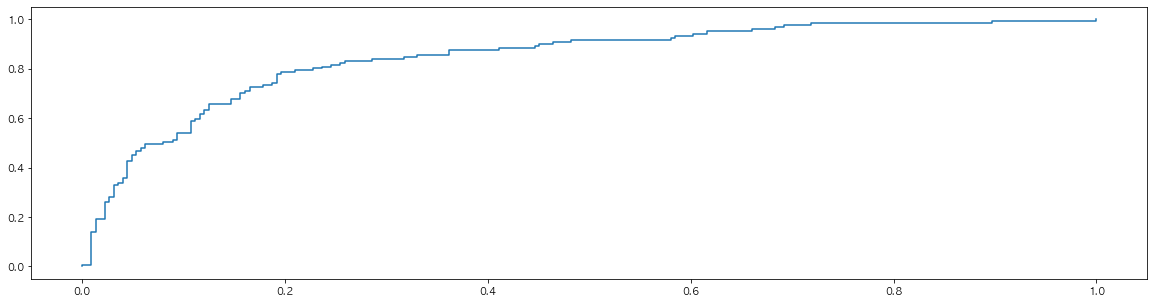

In [1270]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 이렇게하여 AUC와 ROC curve도 나타냈다. AUC는 1에 가까울수록 모델의 성능이 좋은 것이며, ROC curve는 (0,1)로 그래프가 가까이 갈 수록 정확도가 좋은 것이다. 

## 2번 

In [215]:
x_train,x_test, y_train,y_test = train_test_split(x, y, stratify=y,train_size=0.8,test_size=0.2,random_state=None)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(1417, 5) (355, 5) (1417,) (355,)


In [216]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.382586
         Iterations 8


In [217]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1417
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.4196
Time:                        20:12:00   Log-Likelihood:                -542.12
converged:                       True   LL-Null:                       -934.12
Covariance Type:            nonrobust   LLR p-value:                2.260e-168
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5417      0.176     -8.777      0.000      -1.886      -1.197
유동비율          -0.0010      0.000     -2.656      0.008      -0.002      -0.000
차입금/자기자본       0.0289      0.003     11.476      0.000       0.024       0.034
총자본순이익율       -0.1682      0.014    -12.271      0.000      -0.195      -0.141
총자산증가율         0.0066      0.002      3.335      0.001       0.003       0.010
==============================================================================
"""

In [218]:
np.exp(results.params)

const       0.214011
유동비율        0.998996
차입금/자기자본    1.029346
총자본순이익율     0.845213
총자산증가율      1.006592
dtype: float64

In [219]:
pred_y = results.predict(x_test)
pred_y

1280    0.093595
1559    0.283633
1321    0.252889
642     0.719648
1124    0.567349
          ...   
1056    0.007989
944     0.284362
1157    0.304996
1391    0.433594
577     0.097374
Length: 355, dtype: float64

In [220]:
def cut_off(y, threshold) :
    Y = y.copy()  
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1280    0
1559    0
1321    0
642     1
1124    1
       ..
1056    0
944     0
1157    0
1391    0
577     0
Length: 355, dtype: int64

In [221]:
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[212  12]
 [ 33  98]]


In [222]:
def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.8732394366197183

In [223]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.369014
0.1,0.664789
0.2,0.797183
0.3,0.853521
0.4,0.878873
0.5,0.873239
0.6,0.842254
0.7,0.819718
0.8,0.771831


AUC: 0.9306161395856051


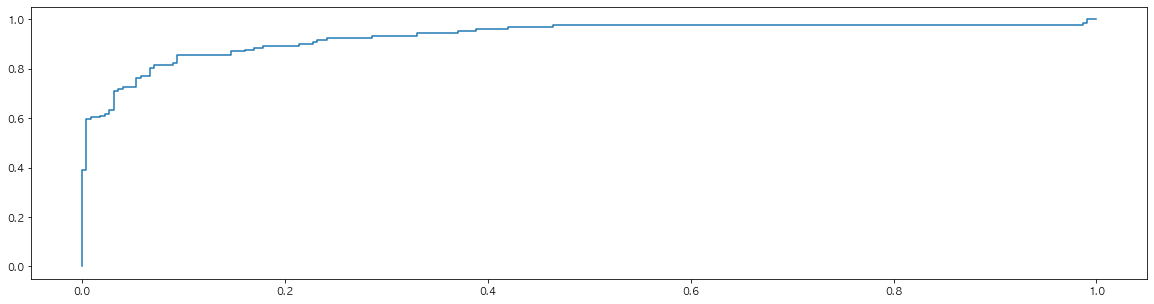

In [224]:
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 3번

In [226]:
x_train,x_test, y_train,y_test = train_test_split(x, y, stratify=y,train_size=0.8,test_size=0.2,random_state=None)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(1417, 5) (355, 5) (1417,) (355,)


In [227]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.374868
         Iterations 8


In [228]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1417
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.4313
Time:                        20:14:27   Log-Likelihood:                -531.19
converged:                       True   LL-Null:                       -934.12
Covariance Type:            nonrobust   LLR p-value:                4.132e-173
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6369      0.169     -9.662      0.000      -1.969      -1.305
유동비율          -0.0008      0.000     -2.387      0.017      -0.001      -0.000
차입금/자기자본       0.0303      0.003     11.901      0.000       0.025       0.035
총자본순이익율       -0.1738      0.014    -12.495      0.000      -0.201      -0.147
총자산증가율         0.0063      0.002      2.965      0.003       0.002       0.010
==============================================================================
"""

In [229]:
np.exp(results.params)

const       0.194577
유동비율        0.999242
차입금/자기자본    1.030737
총자본순이익율     0.840475
총자산증가율      1.006311
dtype: float64

In [230]:
pred_y = results.predict(x_test)
pred_y

719     4.758721e-01
31      2.900523e-08
740     4.894769e-02
1285    7.509851e-01
1387    2.697271e-01
            ...     
1426    4.719969e-01
1117    2.053123e-01
67      5.508925e-01
526     2.532364e-01
738     2.282922e-02
Length: 355, dtype: float64

In [231]:
def cut_off(y, threshold) :
    Y = y.copy()  
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

719     0
31      0
740     0
1285    1
1387    0
       ..
1426    0
1117    0
67      1
526     0
738     0
Length: 355, dtype: int64

In [232]:
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[210  14]
 [ 45  86]]


In [233]:
def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.8338028169014085

In [234]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.369014
0.1,0.645070
0.2,0.769014
0.3,0.828169
0.4,0.836620
0.5,0.833803
0.6,0.816901
0.7,0.802817
0.8,0.763380


AUC: 0.9097600872410032


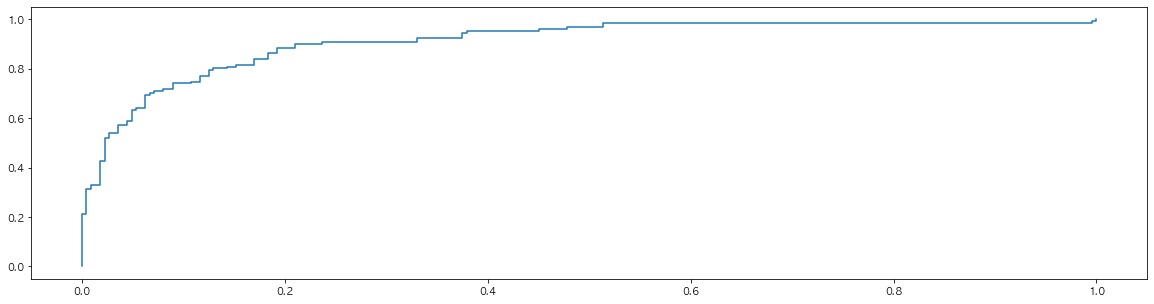

In [236]:
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 4번

In [237]:
x_train,x_test, y_train,y_test = train_test_split(x, y, stratify=y,train_size=0.8,test_size=0.2,random_state=None)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(1417, 5) (355, 5) (1417,) (355,)


In [238]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.374864
         Iterations 8


In [239]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1417
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.4314
Time:                        20:15:57   Log-Likelihood:                -531.18
converged:                       True   LL-Null:                       -934.12
Covariance Type:            nonrobust   LLR p-value:                4.108e-173
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7712      0.186     -9.539      0.000      -2.135      -1.407
유동비율          -0.0011      0.000     -2.589      0.010      -0.002      -0.000
차입금/자기자본       0.0352      0.003     12.586      0.000       0.030       0.041
총자본순이익율       -0.1485      0.012    -12.162      0.000      -0.172      -0.125
총자산증가율         0.0069      0.002      3.245      0.001       0.003       0.011
==============================================================================
"""

In [240]:
np.exp(results.params)

const       0.170124
유동비율        0.998923
차입금/자기자본    1.035868
총자본순이익율     0.862002
총자산증가율      1.006945
dtype: float64

In [241]:
pred_y = results.predict(x_test)
pred_y

760     0.017937
135     0.972611
26      1.000000
778     0.377992
264     0.298523
          ...   
1153    0.581859
169     0.964767
640     1.000000
633     0.039780
1341    0.440982
Length: 355, dtype: float64

In [242]:
def cut_off(y, threshold) :
    Y = y.copy()  
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

760     0
135     1
26      1
778     0
264     0
       ..
1153    1
169     1
640     1
633     0
1341    0
Length: 355, dtype: int64

In [243]:
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[197  27]
 [ 36  95]]


In [244]:
def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.8225352112676056

In [245]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.369014
0.1,0.661972
0.2,0.749296
0.3,0.794366
0.4,0.822535
0.5,0.822535
0.6,0.830986
0.7,0.822535
0.8,0.797183


AUC: 0.9067270992366412


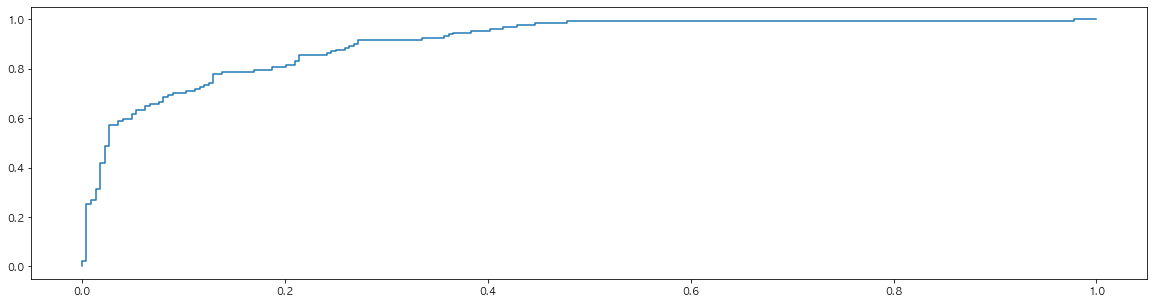

In [246]:
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 5번

In [247]:
x_train,x_test, y_train,y_test = train_test_split(x, y, stratify=y,train_size=0.8,test_size=0.2,random_state=None)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(1417, 5) (355, 5) (1417,) (355,)


In [248]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.354573
         Iterations 8


In [249]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             신용등급(종속변수)   No. Observations:                 1417
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.4621
Time:                        20:17:01   Log-Likelihood:                -502.43
converged:                       True   LL-Null:                       -934.12
Covariance Type:            nonrobust   LLR p-value:                1.434e-185
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6193      0.194     -8.368      0.000      -1.999      -1.240
유동비율          -0.0016      0.000     -3.461      0.001      -0.002      -0.001
차입금/자기자본       0.0332      0.003     11.789      0.000       0.028       0.039
총자본순이익율       -0.1677      0.014    -12.405      0.000      -0.194      -0.141
총자산증가율         0.0080      0.002      3.706      0.000       0.004       0.012
==============================================================================
"""

In [250]:
np.exp(results.params)

const       0.198043
유동비율        0.998426
차입금/자기자본    1.033803
총자본순이익율     0.845638
총자산증가율      1.008008
dtype: float64

In [251]:
pred_y = results.predict(x_test)
pred_y

1233    0.363918
1182    0.265065
736     0.127819
79      0.154427
1652    0.066704
          ...   
1643    0.776132
1440    0.209389
238     0.267603
684     0.219796
1654    0.969405
Length: 355, dtype: float64

In [252]:
def cut_off(y, threshold) :
    Y = y.copy() 
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1233    0
1182    0
736     0
79      0
1652    0
       ..
1643    1
1440    0
238     0
684     0
1654    1
Length: 355, dtype: int64

In [253]:
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[208  16]
 [ 40  91]]


In [254]:
def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.8422535211267606

In [255]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.369014
0.1,0.630986
0.2,0.743662
0.3,0.819718
0.4,0.853521
0.5,0.842254
0.6,0.814085
0.7,0.797183
0.8,0.746479


AUC: 0.8957878953107961


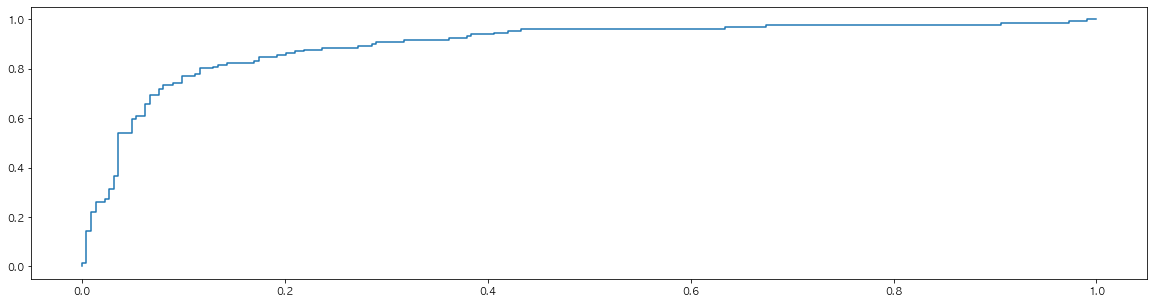

In [256]:
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print("AUC:",auc)